### Лабораторная работа №3
#### Выполнила Блистунова Валерия
#### группа М8О-401Б-18

In [2]:
# Подключаем необходимые библиотеки
import matplotlib.pyplot as plt
import numpy as np
import scipy.stats as sps

Сгенерируем три пары выборок. Пусть $$X\sim R(1,2)$$ $$Y_{1}=3x+5\varepsilon$$ $$Y_{2}=2x^{2}+5\varepsilon$$ $$Y_{3}=cos(x)+\varepsilon$$

In [56]:
def func(n):
    alfa = 0.01
    sp_list = []
    tmp_sp1 = 0
    tmp_sp2 = 0
    tmp_sp3 = 0
    tmp_ch1 = 0
    tmp_ch2 = 0
    tmp_ch3 = 0
    tmp_corr1 = 0
    tmp_corr2 = 0
    tmp_corr3 = 0
    for i in range(n):
        X = np.random.uniform(1,2,n)
        X1 = np.random.uniform(-1,1,n)
        E = np.random.normal(0,1,n)
        Y1 = []
        Y2 = []
        Y3 = []
        for i in range(n):
            Y1.append(3*X[i]+3*E[i])
            Y2.append(2*(X[i])**2+5*E[i])
            Y3.append(np.cos(X1[i])+7*E[i])
        sp_stat1, sp_p1 = sps.spearmanr(X, Y1)
        sp_stat2, sp_p2 = sps.spearmanr(X, Y2)
        sp_stat3, sp_p3 = sps.spearmanr(X1, Y3)
        if(sp_p1 > alfa):
            tmp_sp1 = tmp_sp1 + 1
        if(sp_p2 > alfa):
            tmp_sp2 = tmp_sp2 + 1
        if(sp_p3 > alfa):
            tmp_sp3 = tmp_sp3 + 1
        ch_stat1, ch_p1 = sps.chisquare(f_obs=X,f_exp=Y1)
        ch_stat2, ch_p2 = sps.chisquare(f_obs=X,f_exp=Y2)
        ch_stat3, ch_p3 = sps.chisquare(f_obs=X1,f_exp=Y3)
        if(ch_p1 > alfa):
            tmp_ch1 = tmp_ch1 + 1
        if(ch_p2 > alfa):
            tmp_ch2 = tmp_ch2 + 1
        if(ch_p3 > alfa):
            tmp_ch3 = tmp_ch3 + 1
        corr_stat1, corr_p1 = sps.pearsonr(X,Y1)
        corr_stat2, corr_p2 = sps.pearsonr(X,Y2)
        corr_stat3, corr_p3 = sps.pearsonr(X1,Y3)
        if(corr_p1 > alfa):
            tmp_corr1 = tmp_corr1 + 1
        if(corr_p2 > alfa):
            tmp_corr2 = tmp_corr2 + 1
        if(corr_p3 > alfa):
            tmp_corr3 = tmp_corr3 + 1
    data_sp = {'linear': tmp_sp1/n, 'monotone': tmp_sp2/n, 'non-monotonic': tmp_sp3/n}
    data_ch = {'linear': tmp_ch1/n, 'monotone': tmp_ch2/n, 'non-monotonic': tmp_ch3/n}
    data_corr = {'linear': tmp_corr1/n, 'monotone': tmp_corr2/n, 'non-monotonic': tmp_corr3/n}
    names = list(data_sp.keys())
    fig, axs = plt.subplots(1, 3, figsize=(15, 6), sharey=True)
    axs[0].set_title('Spearman')
    axs[0].bar(names, list(data_sp.values()))
    axs[1].set_title('Chi-square')
    axs[1].bar(names, list(data_ch.values()))
    axs[2].set_title('Correlation')
    axs[2].bar(names, list(data_corr.values()))

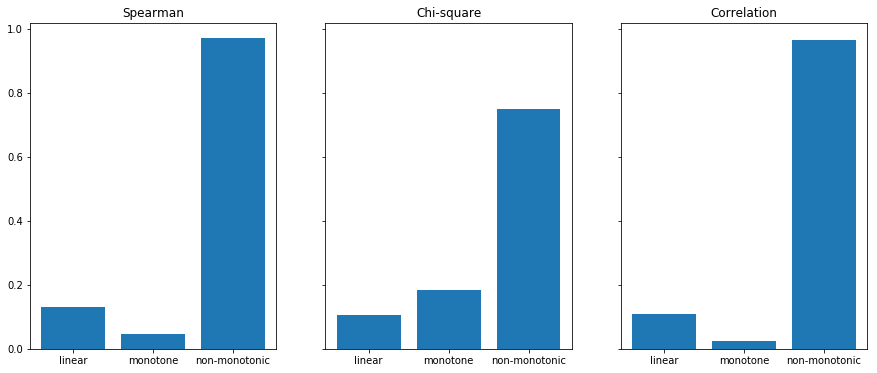

In [57]:
func(200)